# Graph generation

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import dabest
import itertools
from scipy import stats

In [10]:
def colwise_ttest(data: pd.DataFrame) -> pd.DataFrame:
    """Execute pairwise t-test for given dataframe.

    Parameters
    ----------
    data : pd.DataFrame

    Returns
    -------
    pd.DataFrame
    """
    colpairs = itertools.combinations(data.columns, 2)
    # Keep same reporter columns only.
    colpairs = [pair for pair in colpairs if pair[0].split("_")[-1] == pair[1].split("_")[-1]]
    df = pd.DataFrame(colpairs, columns=["pair0", "pair1"])
    df["pvalue"] = [
        stats.ttest_ind(data[pair[0]], data[pair[1]], equal_var=False).pvalue for pair in colpairs
    ]
    return df

In [4]:
# Plot settings configure.
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [5]:
# Load the dataset.
A549_data = pd.read_csv("180303_A549_time_sum3.csv")
df = A549_data.iloc[:,[5,11,17,23]]
df = df[df.sum(axis=1)!=0]  # drop rows with all NaNs
df.describe()

2.1          2.3          2.5          2.7
count  1640.000000  4667.000000  1827.000000   708.000000
mean    374.624165   272.975082   235.813689   214.667811
std     511.177013   253.019301   222.889966   235.272147
min       0.000000     1.500000     1.490000     3.610000
25%     131.275000   112.445000    78.275000    72.567500
50%     235.160000   224.430000   196.060000   154.890000
75%     376.615000   352.835000   320.890000   277.190000
max    2996.580000  2746.970000  2262.940000  3371.300000

In [6]:
# Distance histgram of GFP from mCherry signal
df.plot(kind='density', bw_method=0.1,figsize=(20, 5),
         title='Distance histgram of GFP from mCherry signal',
         grid=True,
         xticks=[0, 200, 400, 600, 800, 1000], xlim=[0,1000],
         yticks=[0, 0.0010, 0.0020, 0.003, 0.0040], ylim=[0, 0.0040],
         fontsize=24, colormap="viridis")

plt.savefig('180303_A549_time_GFP_distdensity02_demo.png')
plt.savefig('180303_A549_time_GFP_distdensity02_demo.pdf')
plt.savefig('180303_A549_time_GFP_distdensity02_demo.eps')

findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not comp

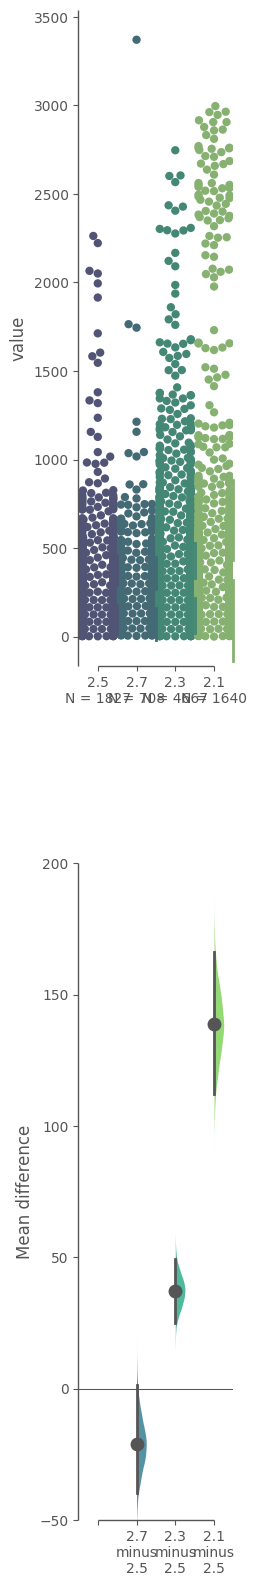

In [7]:
# Load the above data into 'dabest'
df_dabest = dabest.load(df, idx=("2.5", "2.7", "2.3", "2.1"), ci=95)
df_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", contrast_ylim=(-50, 200))

plt.savefig('180303_A549_time_GFP_distdensity21_demo.png')
plt.savefig('180303_A549_time_GFP_distdensity21_demo.pdf')
plt.savefig('180303_A549_time_GFP_distdensity21_demo.eps')

In [14]:
# Load the csv dataset
A549_0 = pd.read_csv("180303_time.csv")
df_A549v = A549_0.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]
df_A549n = A549_0.iloc[:,[8, 9, 10, 11, 12, 13, 14, 15]]

# Load the csv dataset
A549_1 = pd.read_csv("191108_0303A549_col_02.csv")
df_A549c = A549_1.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]

In [13]:
colwise_ttest(df_A549v)

pair0      pair1    pvalue
0   G0C-3_639  G0C-1_639  0.162359
1   G0C-3_639   G0C0_639  0.520616
2   G0C-3_639   G0C1_639  0.047331
3   G0C-3_590  G0C-1_590  0.260896
4   G0C-3_590   G0C0_590  0.466774
5   G0C-3_590   G0C1_590  0.063531
6   G0C-1_639   G0C0_639  0.199410
7   G0C-1_639   G0C1_639  0.105368
8   G0C-1_590   G0C0_590  0.739485
9   G0C-1_590   G0C1_590  0.748004
10   G0C0_639   G0C1_639  0.124160
11   G0C0_590   G0C1_590  0.503623

In [15]:
colwise_ttest(df_A549n)

pair0        pair1    pvalue
0   G0C-3_639.1  G0C-1_639.1  0.117956
1   G0C-3_639.1   G0C0_639.1  0.751720
2   G0C-3_639.1   G0C1_639.1  0.067688
3   G0C-3_590.1  G0C-1_590.1  0.835133
4   G0C-3_590.1   G0C0_590.1  0.710197
5   G0C-3_590.1   G0C1_590.1  0.005348
6   G0C-1_639.1   G0C0_639.1  0.117574
7   G0C-1_639.1   G0C1_639.1  0.067445
8   G0C-1_590.1   G0C0_590.1  0.992474
9   G0C-1_590.1   G0C1_590.1  0.055919
10   G0C0_639.1   G0C1_639.1  0.146165
11   G0C0_590.1   G0C1_590.1  0.003801

In [16]:
colwise_ttest(df_A549c)

pair0      pair1    pvalue
0   C-3G0_590  C-1G0_590  0.011214
1   C-3G0_590   C0G0_590  0.330921
2   C-3G0_590   C1G0_590  0.038816
3   C-3G0_639  C-1G0_639  0.883883
4   C-3G0_639   C0G0_639  0.245407
5   C-3G0_639   C1G0_639  0.064747
6   C-1G0_590   C0G0_590  0.442741
7   C-1G0_590   C1G0_590  0.005804
8   C-1G0_639   C0G0_639  0.227705
9   C-1G0_639   C1G0_639  0.056836
10   C0G0_590   C1G0_590  0.162518
11   C0G0_639   C1G0_639  0.579953

In [18]:
#make dataframe 
df = pd.read_csv('191115_0303A549_dose_f590CG_t639CG_04.csv')
df = df.iloc[:,[20,42,64,86]]

#make graph by "pandas plot"
df.plot(kind='density', bw_method=0.1,figsize=(20, 5),
         title='Distance histgram; from 639CG to 590CG',
         grid=True,
         xticks=[0, 200, 400, 600, 800, 1000], xlim=[0,1000],
         yticks=[0, 0.001, 0.002, 0.003, 0.004], ylim=[0, 0.004],
         fontsize=24, colormap="viridis")

plt.savefig('191209_0303_A549_dose_f590CG_t639CG_cdistdensity04_demo.png')
plt.savefig('191209_0303_A549_dose_f590CG_t639CG_cdistdensity04_demo.pdf')
plt.savefig('191209_0303_A549_dose_f590CG_t639CG_cdistdensity04_demo.eps')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


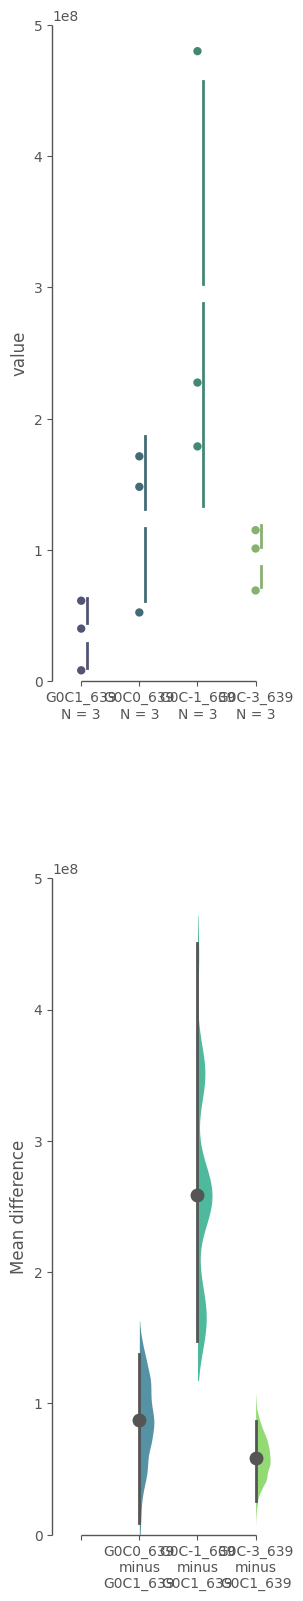

In [21]:
# Load the above data into 'dabest'
A549v_dabest = dabest.load(df_A549v, idx=("G0C1_639", "G0C0_639", "G0C-1_639", "G0C-3_639"), ci=95)
A549v_dabest.mean_diff.plot(fig_size=(3, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 500000000), contrast_ylim=(0, 500000000))

plt.savefig("191115_A549_time_Vol_01_demo.png")
plt.savefig("191115_A549_time_Vol_01_demo.pdf")
plt.savefig("191115_A549_time_Vol_01_demo.eps")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


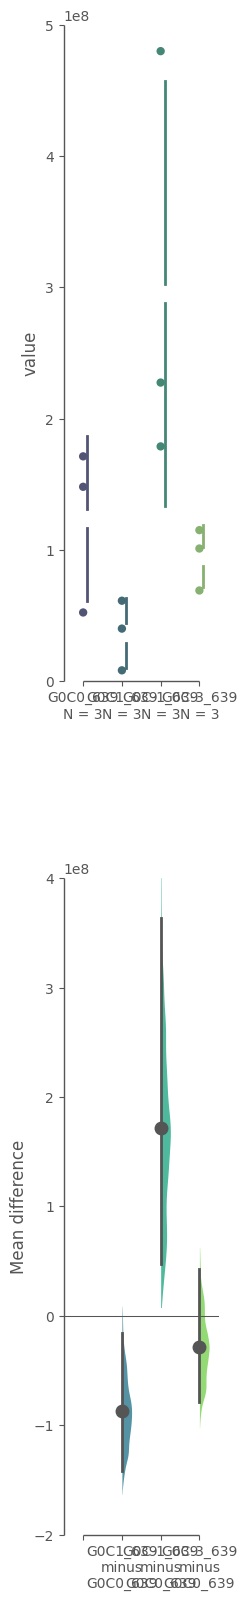

In [22]:
# Load the above data into 'dabest'
A549v_dabest = dabest.load(df_A549v, idx=("G0C0_639", "G0C1_639", "G0C-1_639", "G0C-3_639"), ci=95)
A549v_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 500000000), contrast_ylim=(-200000000, 400000000))

plt.savefig("191115_A549_time_Vol_02_demo.png")
plt.savefig("191115_A549_time_Vol_02_demo.pdf")
plt.savefig("191115_A549_time_Vol_02_demo.eps")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


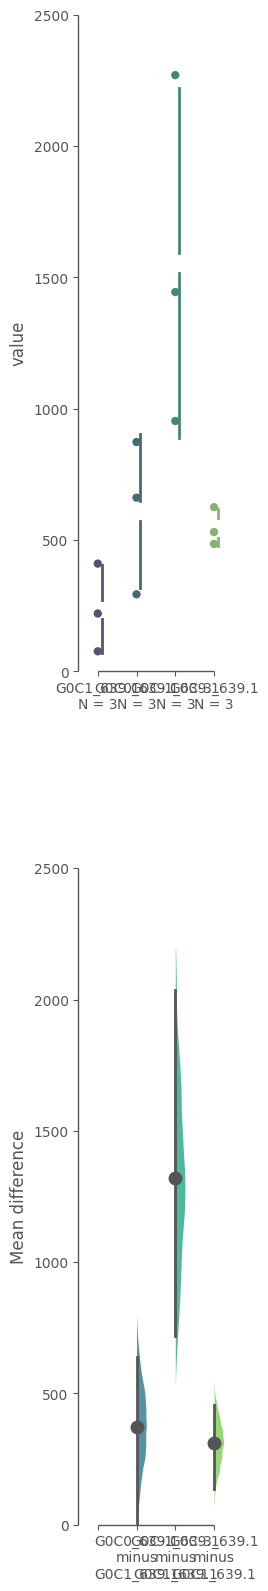

In [25]:
# Load the above data into 'dabest'
A549n_dabest = dabest.load(df_A549n, idx=("G0C1_639.1", "G0C0_639.1", "G0C-1_639.1", "G0C-3_639.1"), ci=95)
A549n_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 2500), contrast_ylim=(0, 2500))

plt.savefig("191115_A549_time_Num_03_demo.png")
plt.savefig("191115_A549_time_Num_03_demo.pdf")
plt.savefig("191115_A549_time_Num_03_demo.eps")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


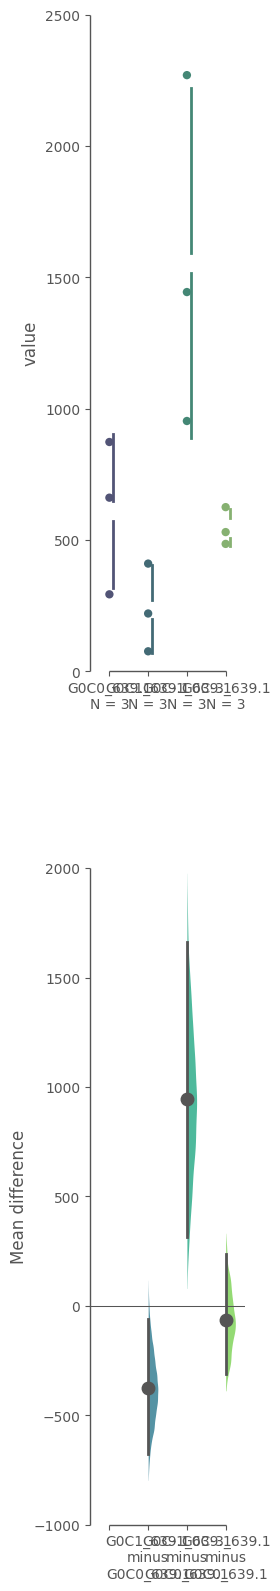

In [24]:
# Load the above data into 'dabest'
A549n_dabest = dabest.load(df_A549n, idx=("G0C0_639.1", "G0C1_639.1", "G0C-1_639.1", "G0C-3_639.1"), ci=95)
A549n_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 2500), contrast_ylim=(-1000, 2000))

plt.savefig("191115_A549_time_Num_04_demo.png")
plt.savefig("191115_A549_time_Num_04_demo.pdf")
plt.savefig("191115_A549_time_Num_04_demo.eps")